https://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1?select=Loan_status_2007-2020Q3.gzip

In [109]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
# import kagglehub
# ethon0426_lending_club_20072020q1_path = kagglehub.dataset_download('ethon0426/lending-club-20072020q1')

# print('Data source import complete.')


In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [112]:
df = pd.read_csv('p2p_loan_data.csv')
Y= df['loan_status']
encoded = df.drop(['loan_status'], axis=1)

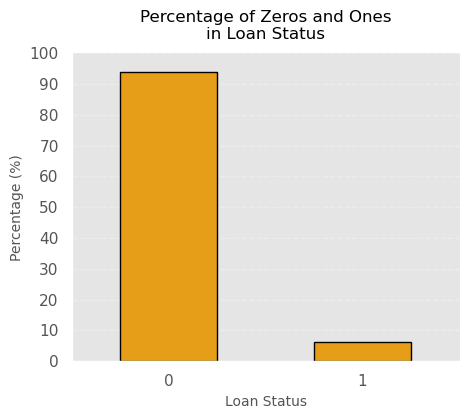

In [113]:

# Calculate percentages
value_counts = df['loan_status'].value_counts(normalize=True) * 100
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['loan_status', 'percentage']

# Plotting
plt.figure(figsize=(5, 4))  # Smaller figure size
ax = sns.barplot(
    data=value_counts_df,
    x='loan_status',
    y='percentage',
    color='orange',        # Orange bars
    width=0.5,             # Thinner bars (default: 0.8)
    saturation=0.8,        # Vibrant but not neon
    edgecolor='black',     # Black outlines
    linewidth=1
)

# Customize axes and labels
plt.title('Percentage of Zeros and Ones\nin Loan Status', fontsize=12, pad=10)
plt.xlabel('Loan Status', fontsize=10)
plt.ylabel('Percentage (%)', fontsize=10)
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.yticks(range(0, 101, 10))  # 10% step size (0%, 10%, ..., 100%)

# Remove spines and adjust grid
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.3)  # Optional: light grid lines

# Save high-res figure
plt.savefig(
    'loan_status_percentage.png',
    dpi=300,
    bbox_inches='tight',
    facecolor='white'
)

plt.show()

In [114]:
from sklearn.model_selection import train_test_split
# First split: Test set (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    encoded, Y,
    test_size=0.20,
    random_state=42,
    stratify=Y
)

# Second split: Train (60%) and Validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.25,  # 0.25 * 80% = 20% of total
    random_state=42,
    stratify=y_train_val
)

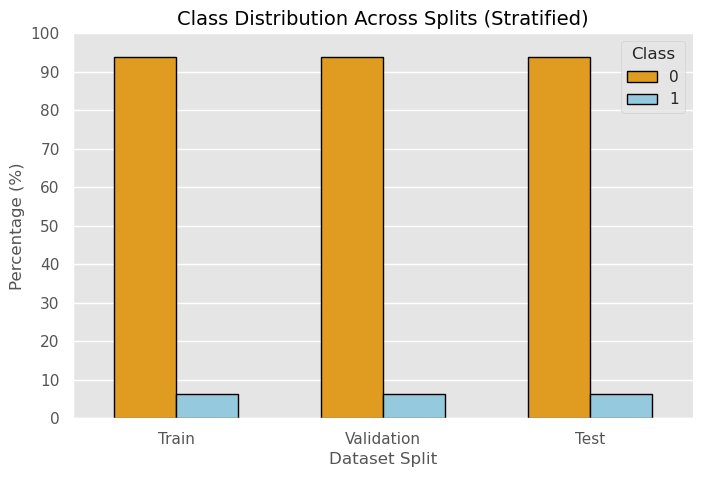

In [115]:


# Combine split labels and target values
splits = {
    'Train': y_train,
    'Validation': y_val,
    'Test': y_test
}

# Calculate percentages for each split
data = []
for name, y in splits.items():
    counts = y.value_counts(normalize=True) * 100
    for value, percent in counts.items():
        data.append({'Split': name, 'Class': str(value), 'Percentage': percent})

# Convert to DataFrame
plot_df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=plot_df,
    x='Split',
    y='Percentage',
    hue='Class',
    palette=['orange', 'skyblue'],  # Orange for 0, blue for 1
    width=0.6,
    edgecolor='black',
    linewidth=1
)

# Customize
plt.title('Class Distribution Across Splits (Stratified)', fontsize=14)
plt.xlabel('Dataset Split', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.yticks(range(0, 101, 10))  # 10% steps
plt.legend(title='Class')
sns.despine()

# Save
plt.savefig('class_distribution_splits.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [116]:
train_set = pd.concat([X_train, y_train], axis=1)
val_set = pd.concat([X_val, y_val], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

# Save to CSV
train_set.to_csv('train_set.csv', index=False)
val_set.to_csv('validation_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)

In [117]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527265 entries, 0 to 527264
Columns: 159 entries, loan_amnt to application_type_Joint App
dtypes: float64(153), int64(6)
memory usage: 639.6 MB


In [118]:
encoded.isna().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
                              ..
addr_state_WI                  0
addr_state_WV                  0
addr_state_WY                  0
application_type_Individual    0
application_type_Joint App     0
Length: 159, dtype: int64

In [119]:
# from sklearn.feature_selection import VarianceThreshold

# # Remove features with <1% variance
# selector = VarianceThreshold(threshold=0.01)
# X_filtered = selector.fit_transform(encoded)
# var_filtered = pd.DataFrame(X_filtered, columns = selector.get_feature_names_out())
# # Assuming 'df' is your DataFrame
# variances = var_filtered.var().sort_values(ascending=False)
# plt.figure(figsize=(10, 60))  # Adjust figure size as needed
# plt.barh(variances.index, variances.values)
# plt.title('Feature Variances')
# plt.xlabel('Variance')
# plt.ylabel('Features')
# plt.savefig('var_Results.png', dpi=300, bbox_inches='tight') 
# plt.show()

In [120]:


# # Drop highly correlated numerical features (Pearson |corr| > 0.9)
# corr_matrix = var_filtered.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
# corr_filtered = var_filtered.drop(to_drop, axis=1)

In [121]:
# correlation_matrix = corr_filtered.corr()
# plt.figure(figsize=(10, 8))  # Adjust figure size as needed
# sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

In [122]:
# from sklearn.feature_selection import SelectKBest, f_classif, chi2,mutual_info_classif

# # Select top 20 numerical features
# selector = SelectKBest(mutual_info_classif, k=20)
# X_selected = selector.fit_transform(corr_filtered, Y)  # X_num = numerical subset


In [123]:
# selector.get_feature_names_out()

In [124]:
# scores = selector.scores_
# feature_names = corr_filtered.columns

# # Create a DataFrame for easy sorting
# feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': scores})
# feature_scores = feature_scores.sort_values('Score', ascending=False)

# # Plot (horizontal bar chart)
# plt.figure(figsize=(10, 8))
# plt.barh(feature_scores['Feature'][:20], feature_scores['Score'][:20], color='skyblue')
# plt.xlabel('Importance Score (Mutual Information)')
# plt.title('Top 20 Features by Mutual Information Score')
# plt.gca().invert_yaxis()  # Highest score at top
# plt.savefig('fil_Results.png', dpi=300, bbox_inches='tight') 
# plt.show()

In [125]:
# selector = SelectKBest(mutual_info_classif, k=20)
# X_selected = selector.fit_transform(encoded, Y)
# selector.get_feature_names_out()

In [126]:
# scores = selector.scores_
# feature_names = encoded.columns

# # Create a DataFrame for easy sorting
# feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': scores})
# feature_scores = feature_scores.sort_values('Score', ascending=False)

# # Plot (horizontal bar chart)
# plt.figure(figsize=(10, 8))
# plt.barh(feature_scores['Feature'][:20], feature_scores['Score'][:20], color='skyblue')
# plt.xlabel('Importance Score (Mutual Information)')
# plt.title('Top 20 Features by Mutual Information Score')
# plt.gca().invert_yaxis()  # Highest score at top
# plt.savefig('en_Results4.png', dpi=300, bbox_inches='tight') 
# plt.show()

In [127]:
# X_selected = pd.DataFrame(X_selected, columns= selector.get_feature_names_out())
# correlation_matrix = X_selected.corr()
# plt.figure(figsize=(10, 8))  # Adjust figure size as needed
# sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
# plt.savefig('RFECV_Results3.png', dpi=300, bbox_inches='tight') 
# plt.show()

In [128]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
# model.fit(corr_filtered, Y)
# selected_features = corr_filtered.columns[model.coef_[0] != 0]



In [129]:
# for feature in selected_features:
#     i = 0
#     if model.coef_[i] != 0
#         print(feature, model.coef_[i])
#     i +=1

In [130]:
# from sklearn.feature_selection import RFECV
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_jobs=16)
# rfe = RFECV(model, min_features_to_select=10, cv=5,n_jobs=6)
# rfe.fit(encoded, y_train)
# selected_features = encoded.columns[rfe.support_]

In [131]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# print("--- RFECV Results ---")
# print(f"Optimal number of features found: {rfe.n_features_}")

# # Create a DataFrame for selected features
# df_selected_features = pd.DataFrame({'Selected Features': selected_features})
# print("\nFeatures selected by RFECV:")
# print(df_selected_features.to_string()) # Use to_string() to prevent truncation if many features

In [132]:
# # --- Optional: Train a final model on selected features ---
# print("\n--- Training Final Model on Selected Features ---")
# final_model = RandomForestClassifier(n_jobs=16, random_state=42) # Use same settings + random_state
# final_model.fit(encoded[selected_features], Y)

# # Get importances from the final model
# importances = final_model.feature_importances_
# df_importances = pd.DataFrame({
#     'Feature': selected_features,
#     'Importance': importances
# }).sort_values(by='Importance', ascending=False)

# print("\nFeature Importances from Final Model (using selected features):")
# print(df_importances)

# # --- Plotting Feature Importances ---
# plt.figure(figsize=(10, max(6, len(selected_features) * 0.3))) # Adjust height based on # features
# sns.barplot(x='Importance', y='Feature', data=df_importances, palette='viridis')
# plt.title('Feature Importances of Selected Features (Final Model)')
# plt.xlabel('Importance Score')
# plt.ylabel('Feature')
# plt.tight_layout() # Adjust layout to prevent labels overlapping
# plt.show()

In [133]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFECV
# import matplotlib.ticker as mticker # For formatting ticks
# import os # To manage file paths if needed

# # --- Assume your previous code has been run ---
# # Variables needed: rfe, encoded, Y, selected_features
# # --- Make sure these are loaded before running the plotting code ---

# print("--- Generating Plots (Final Tweaks) ---")

# # Define filenames for saving
# plot1_filename = "rfecv_performance_plot_annotated_v2.png"
# plot2_filename = "feature_importance_plot_default_style.png" # New name for clarity

# # --- Plot 1: Cross-Validation Score vs. Number of Features (Updated Y-Label) ---

# # Style settings for the first plot (White/Yellow/Black theme)
# sns.set_style("whitegrid")
# plt.rc('font', family='sans-serif')
# plt.rc('figure', figsize=(12, 6))
# plt.rc('axes', labelcolor='black', titlecolor='black')
# plt.rc('xtick', color='black')
# plt.rc('ytick', color='black')
# plt.rc('text', color='black')

# # Get the results
# cv_results = rfe.cv_results_
# mean_scores = cv_results['mean_test_score']
# std_scores = cv_results['std_test_score']

# # Convert scores to percentages
# mean_scores_pct = mean_scores * 100
# std_scores_pct = std_scores * 100

# # Determine feature range and optimal point
# min_features = rfe.min_features_to_select
# n_features_tested_range = np.arange(min_features, len(mean_scores) + min_features)
# optimal_n_features = rfe.n_features_
# optimal_score_pct = mean_scores_pct[optimal_n_features - min_features]

# # X-axis tick reduction logic (excluding optimal tick - reuse from previous)
# num_points = len(n_features_tested_range)
# step = max(1, num_points // 15)
# base_ticks = np.arange(min_features, len(mean_scores) + min_features, step)
# final_ticks = [tick for tick in base_ticks if tick != optimal_n_features]
# if min_features not in final_ticks:
#      final_ticks.insert(0, min_features)
# if n_features_tested_range[-1] not in final_ticks:
#      final_ticks.append(n_features_tested_range[-1])
# reduced_ticks = np.sort(np.array(list(set(final_ticks))))

# # Plotting
# fig1, ax1 = plt.subplots(figsize=(12, 6))

# # Define colors
# line_color = '#005a9e'
# highlight_color = '#ffbf00'
# fill_color = '#a6cee3'

# # Plot the mean scores
# ax1.plot(n_features_tested_range, mean_scores_pct, marker='o', linestyle='-', markersize=5,
#          color=line_color, label='Mean CV Score')

# # Plot the error band
# ax1.fill_between(n_features_tested_range,
#                  mean_scores_pct - std_scores_pct,
#                  mean_scores_pct + std_scores_pct,
#                  alpha=0.3, color=fill_color)

# # Highlight the optimal number of features line
# ax1.axvline(x=optimal_n_features, color=highlight_color, linestyle='--', linewidth=2,
#             label=f'Optimal Feature Count Line ({optimal_n_features})')

# # Plot the optimal marker
# ax1.plot(optimal_n_features, optimal_score_pct, marker='*', markersize=15,
#          color=highlight_color, markeredgecolor='black',
#          label='Optimal Point')

# # Add the text annotation for optimal number of features
# x_range = n_features_tested_range.max() - n_features_tested_range.min()
# y_range = mean_scores_pct.max() - mean_scores_pct.min()
# x_offset = x_range * 0.02
# y_offset = y_range * 0.05
# annotation_text = f"The optimal number\nof features is {optimal_n_features}"
# ax1.text(optimal_n_features + x_offset, optimal_score_pct + y_offset,
#          annotation_text,
#          fontsize=11,
#          color='black',
#          verticalalignment='bottom',
#          horizontalalignment='left',
#          bbox=dict(boxstyle='round,pad=0.4', fc='white', alpha=0.8, ec='grey'))

# # Apply formatting
# ax1.set_title('RFECV: Performance vs. Number of Features', fontsize=16, color='black')
# ax1.set_xlabel('Number of Features Selected', fontsize=12, color='black')

# # --- MODIFIED Y-AXIS LABEL ---
# ax1.set_ylabel("Cross-Validated Score (Mean Accuracy %)", fontsize=12, color='black')
# # --- END MODIFICATION ---

# # Apply reduced ticks to x-axis
# ax1.set_xticks(reduced_ticks)
# ax1.tick_params(axis='x', labelcolor='black', labelsize=10)
# ax1.tick_params(axis='y', labelcolor='black')

# # Format y-axis as percentage
# ax1.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100.0))

# ax1.legend(loc='lower right', frameon=True, facecolor='white', edgecolor='grey')
# ax1.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey')

# # Adjust limits slightly if text goes out of bounds
# current_ylim = ax1.get_ylim()
# ax1.set_ylim(current_ylim[0], current_ylim[1] + y_range * 0.08)
# current_xlim = ax1.get_xlim()
# ax1.set_xlim(current_xlim[0], current_xlim[1] + x_range * 0.05)

# fig1.tight_layout(rect=[0, 0, 0.98, 0.98])

# # --- Save the first plot ---
# print(f"Saving performance plot to: {os.path.abspath(plot1_filename)}")
# fig1.savefig(plot1_filename, dpi=300, bbox_inches='tight')

# plt.show() # Show the first plot


# # --- Plot 2: Feature Importances (Reset to Default Style) ---

# # --- Reset Seaborn/Matplotlib styles to default before creating the second plot ---
# print("\nResetting plot style to default for Feature Importance plot.")
# sns.set_theme() # Resets to Seaborn defaults (often a grey background)
# # plt.rcdefaults() # Optionally uncomment to reset pure matplotlib defaults too
# # --------------------------------------------------------------------------------

# # Check if df_importances exists, otherwise regenerate
# if 'df_importances' not in locals():
#      print("\n--- Training Final Model on Selected Features (for Importance Plot) ---")
#      final_model = RandomForestClassifier(n_jobs=16, random_state=42)
#      final_model.fit(encoded[selected_features], Y)
#      importances = final_model.feature_importances_
#      df_importances = pd.DataFrame({
#          'Feature': selected_features,
#          'Importance': importances
#      }).sort_values(by='Importance', ascending=False).reset_index(drop=True)
#      print("\nFeature Importances from Final Model (using selected features):")
#      print(df_importances)

# # --- Plotting Feature Importances with default style ---
# num_sel_features = len(selected_features)
# plot_height = max(6, num_sel_features * 0.4)

# # Create figure and axes AFTER resetting style
# fig2, ax2 = plt.subplots(figsize=(10, plot_height))

# # Use default palette and styling by REMOVING specific palette/color arguments
# sns.barplot(x='Importance', y='Feature', data=df_importances, ax=ax2,palette='viridis') # Removed palette, edgecolor

# # Set titles and labels (will use default colors now)
# ax2.set_title('Feature Importances of Selected Features', fontsize=16) # Removed color='black'
# ax2.set_xlabel('Importance Score', fontsize=12) # Removed color='black'
# ax2.set_ylabel('Feature', fontsize=12) # Removed color='black'

# # Remove specific tick color settings (use default)
# # ax2.tick_params(axis='x', colors='black') # Removed
# # ax2.tick_params(axis='y', colors='black') # Removed

# # Remove specific grid settings (use default)
# # ax2.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.6) # Removed
# # ax2.set_axisbelow(True) # Removed

# fig2.tight_layout()

# # --- Save the second plot ---
# print(f"Saving importance plot to: {os.path.abspath(plot2_filename)}")
# fig2.savefig(plot2_filename, dpi=300, bbox_inches='tight')

# plt.show() # Show the second plot

In [134]:
# p2p_selected_acc_rfe = encoded[selected_features]
# p2p_selected_acc_rfe.to_csv('p2p_selected_acc_rfe.csv',index=False)

In [135]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd # Assuming 'encoded' and 'Y' are ready

print("Starting RFECV with F1-score...")

# Define the model (same as before)
model = RandomForestClassifier(n_jobs=16, random_state=42) # Add random_state for reproducibility

# Define RFECV with the F1 scoring metric
# Use 'f1', 'f1_weighted', 'f1_macro', or 'f1_micro' as appropriate
# 'f1_weighted' is often a good default for imbalanced multiclass/binary
# 'f1' works for binary classification (focuses on the positive class)
f1_scorer_choice = 'f1' # Or 'f1', 'f1_macro'

rfe_f1 = RFECV(
    estimator=model,
    min_features_to_select=4,
    cv=5,
    scoring=f1_scorer_choice, # <-- Key change: Specify F1 scoring
    n_jobs=6,
    step= 1,
    
)

# Fit the new RFECV object
rfe_f1.fit(X_train, y_train)

# Get the results based on F1-score
selected_features_f1 = encoded.columns[rfe_f1.support_]
optimal_n_features_f1 = rfe_f1.n_features_
cv_results_f1 = rfe_f1.cv_results_

print(f"\nRFECV using '{f1_scorer_choice}' completed.")
print(f"Optimal number of features found: {optimal_n_features_f1}")
print("\nFeatures selected based on F1-score:")
print(pd.DataFrame({'Selected Features (F1)': selected_features_f1}))

# Now you can generate the plots using rfe_f1 and cv_results_f1
# Remember to update the y-axis label on the performance plot accordingly!
# e.g., ax1.set_ylabel(f"Cross-Validated Score (Mean {f1_scorer_choice})")

Starting RFECV with F1-score...

RFECV using 'f1' completed.
Optimal number of features found: 4

Features selected based on F1-score:
  Selected Features (F1)
0            funded_amnt
1        funded_amnt_inv
2              out_prncp
3        total_rec_prncp


--- Generating Plots for F1-Score RFECV Results ---
Saving F1 performance plot to: /gpfs/user_home/os_home_dirs/zsherif2/P2P lending/rfecv_f1_performance_plot.png


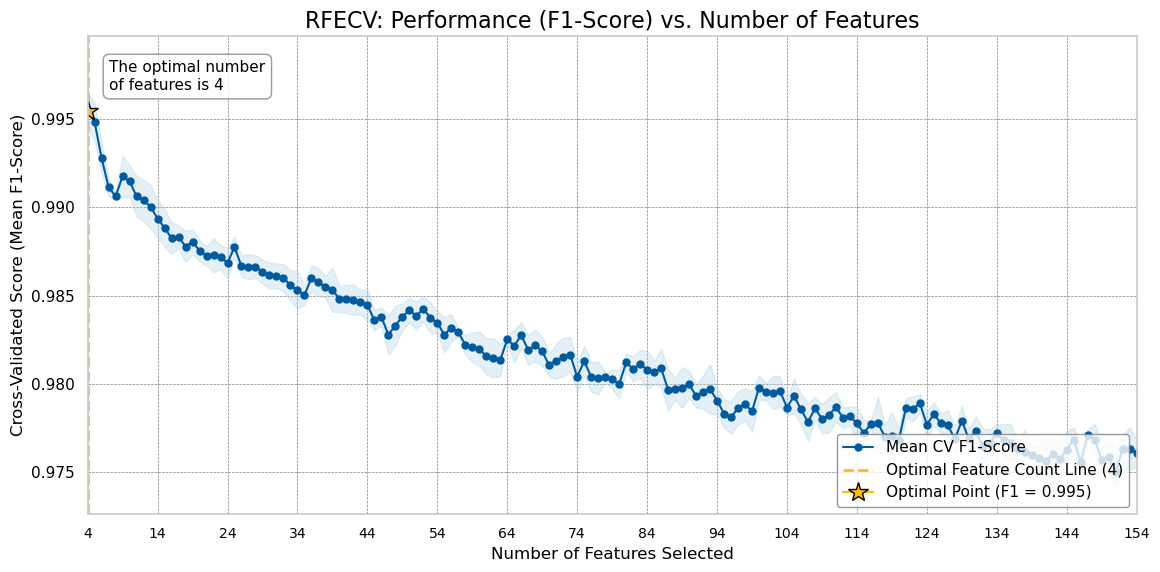


Resetting plot style to default for Feature Importance plot.

--- Training Final Model on F1-Selected Features ---

Feature Importances from Final Model (using F1-selected features):
           Feature  Importance
0  total_rec_prncp    0.525898
1      funded_amnt    0.175131
2        out_prncp    0.171346
3  funded_amnt_inv    0.127625
Saving F1 importance plot to: /gpfs/user_home/os_home_dirs/zsherif2/P2P lending/feature_importance_f1_plot_default_style.png


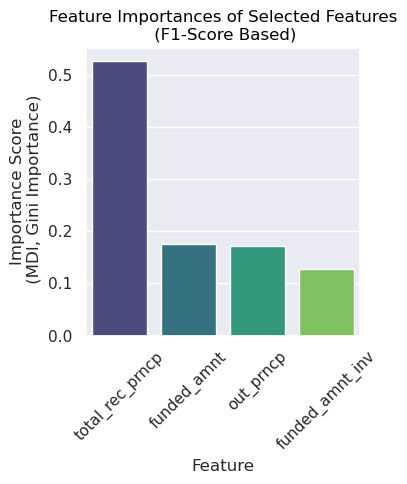

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
# Assuming RFECV is already imported and run
import matplotlib.ticker as mticker # Still potentially useful
import os

# --- Prerequisites ---
# Make sure you have these variables available from your F1-based RFECV run:
# rfe_f1 : The fitted RFECV object (trained with scoring='f1')
# encoded : Your original feature DataFrame
# Y : Your target variable
# selected_features_f1 : List/Index of feature names selected by rfe_f1
# --- End Prerequisites ---

print("--- Generating Plots for F1-Score RFECV Results ---")

# Define filenames for saving
plot1_f1_filename = "rfecv_f1_performance_plot.png"
plot2_f1_filename = "feature_importance_f1_plot_default_style.png"

# --- Plot 1: Cross-Validation Score (F1) vs. Number of Features ---

# Style settings for the first plot (Custom White/Yellow/Black theme)
sns.set_style("whitegrid")
plt.rc('font', family='sans-serif')
plt.rc('figure', figsize=(12, 6))
plt.rc('axes', labelcolor='black', titlecolor='black')
plt.rc('xtick', color='black')
plt.rc('ytick', color='black')
plt.rc('text', color='black')

# Get the results from the F1-based RFECV
cv_results_f1 = rfe_f1.cv_results_
# F1 scores are typically 0-1, no need to multiply by 100 unless you specifically want percentage representation
mean_scores_f1 = cv_results_f1['mean_test_score']
std_scores_f1 = cv_results_f1['std_test_score']

# Determine feature range and optimal point from F1 results
min_features_f1 = rfe_f1.min_features_to_select
n_features_tested_range_f1 = np.arange(min_features_f1, len(mean_scores_f1) + min_features_f1)
optimal_n_features_f1 = rfe_f1.n_features_
optimal_score_f1 = mean_scores_f1[optimal_n_features_f1 - min_features_f1]

# X-axis tick reduction logic (excluding optimal tick - based on F1 results)
num_points_f1 = len(n_features_tested_range_f1)
step_f1 = max(1, num_points_f1 // 15)
base_ticks_f1 = np.arange(min_features_f1, len(mean_scores_f1) + min_features_f1, step_f1)
final_ticks_f1 = [tick for tick in base_ticks_f1 if tick != optimal_n_features_f1]
if min_features_f1 not in final_ticks_f1:
     final_ticks_f1.insert(0, min_features_f1)
if n_features_tested_range_f1[-1] not in final_ticks_f1:
     final_ticks_f1.append(n_features_tested_range_f1[-1])
reduced_ticks_f1 = np.sort(np.array(list(set(final_ticks_f1))))

# Plotting
fig1_f1, ax1_f1 = plt.subplots(figsize=(12, 6))

# Define colors (reusing the custom theme)
line_color = '#005a9e'
highlight_color = '#ffbf00'
fill_color = '#a6cee3'

# Plot the mean F1 scores
ax1_f1.plot(n_features_tested_range_f1, mean_scores_f1, marker='o', linestyle='-', markersize=5,
            color=line_color, label='Mean CV F1-Score ')

# Plot the error band for F1 scores
ax1_f1.fill_between(n_features_tested_range_f1,
                    mean_scores_f1 - std_scores_f1,
                    mean_scores_f1 + std_scores_f1,
                    alpha=0.3, color=fill_color)

# Highlight the optimal number of features line
ax1_f1.axvline(x=optimal_n_features_f1, color=highlight_color, linestyle='--', linewidth=2,
               label=f'Optimal Feature Count Line ({optimal_n_features_f1})')

# Plot the optimal marker
ax1_f1.plot(optimal_n_features_f1, optimal_score_f1, marker='*', markersize=15,
            color=highlight_color, markeredgecolor='black',
            label=f'Optimal Point (F1 = {optimal_score_f1:.3f})') # Show F1 score in label

# Add the text annotation for optimal number of features
x_range_f1 = n_features_tested_range_f1.max() - n_features_tested_range_f1.min()
y_range_f1 = mean_scores_f1.max() - mean_scores_f1.min()
# Adjust offsets if needed based on the new score range (0-1)
x_offset_f1 = x_range_f1 * 0.02
y_offset_f1 = y_range_f1 * 0.05
annotation_text_f1 = f"The optimal number\nof features is {optimal_n_features_f1}"
ax1_f1.text(optimal_n_features_f1 + x_offset_f1, optimal_score_f1 + y_offset_f1,
            annotation_text_f1,
            fontsize=11,
            color='black',
            verticalalignment='bottom',
            horizontalalignment='left',
            bbox=dict(boxstyle='round,pad=0.4', fc='white', alpha=0.8, ec='grey'))

# Apply formatting
ax1_f1.set_title('RFECV: Performance (F1-Score) vs. Number of Features', fontsize=16, color='black')
ax1_f1.set_xlabel('Number of Features Selected', fontsize=12, color='black')
ax1_f1.set_ylabel("Cross-Validated Score (Mean F1-Score)", fontsize=12, color='black') # Updated Y-label

# Apply reduced ticks to x-axis
ax1_f1.set_xticks(reduced_ticks_f1)
ax1_f1.tick_params(axis='x', labelcolor='black', labelsize=10)
ax1_f1.tick_params(axis='y', labelcolor='black')

# Format y-axis (optional: specific formatter if needed, but default is often fine for 0-1 range)
# ax1_f1.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f')) # Example: 2 decimal places

ax1_f1.legend(loc='lower right', frameon=True, facecolor='white', edgecolor='grey') # Adjust loc if needed
ax1_f1.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey')

# Adjust limits slightly if text goes out of bounds
current_ylim_f1 = ax1_f1.get_ylim()
# Ensure ylim starts at or below 0 if scores are low, but add padding at top
ax1_f1.set_ylim(min(8, current_ylim_f1[0]), current_ylim_f1[1] + y_range_f1 * 0.1)
current_xlim_f1 = ax1_f1.get_xlim()
ax1_f1.set_xlim(min_features_f1, 154)

fig1_f1.tight_layout(rect=[0, 0, 0.98, 0.98])

# --- Save the first plot ---
print(f"Saving F1 performance plot to: {os.path.abspath(plot1_f1_filename)}")
fig1_f1.savefig(plot1_f1_filename, dpi=300, bbox_inches='tight')

plt.show() # Show the first plot


# --- Plot 2: Feature Importances of Selected Features (F1-based selection, Default Style) ---

# --- Reset Seaborn/Matplotlib styles to default ---
print("\nResetting plot style to default for Feature Importance plot.")
sns.set_theme() # Resets to Seaborn defaults
# plt.rcdefaults() # Optional
# ---------------------------------------------------

# --- Train a final model on F1-selected features ---
print("\n--- Training Final Model on F1-Selected Features ---")
final_model_f1 = RandomForestClassifier(n_jobs=16, random_state=42) # Use consistent settings
# *** Use features selected by the F1 run ***
final_model_f1.fit(X_train[selected_features_f1], y_train)

# Get importances from the final model
importances_f1 = final_model_f1.feature_importances_
df_importances_f1 = pd.DataFrame({
    'Feature': selected_features_f1, # Use F1 selected features
    'Importance': importances_f1
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\nFeature Importances from Final Model (using F1-selected features):")
print(df_importances_f1)
# --- End Training ---

# --- Plotting Feature Importances with default style ---
num_sel_features_f1 = len(selected_features_f1)
plot_width_f1 = max(2, num_sel_features_f1 )

# Create figure and axes
fig2_f1, ax2_f1 = plt.subplots(figsize=(plot_width_f1, 5))

# Create vertical bar plot by swapping x and y in the barplot call
sns.barplot(x='Feature', y='Importance', data=df_importances_f1, ax=ax2_f1, palette='viridis')

# Set titles and labels (using default colors)
ax2_f1.set_title('Feature Importances of Selected Features\n (F1-Score Based)', fontsize=12)
ax2_f1.set_xlabel('Feature', fontsize=12)
ax2_f1.set_ylabel('Importance Score\n (MDI, Gini Importance)', fontsize=12)

# Rotate x-axis labels for better readability if needed
ax2_f1.tick_params(axis='x', rotation=45)

fig2_f1.tight_layout()

# --- Save the second plot ---
print(f"Saving F1 importance plot to: {os.path.abspath(plot2_f1_filename)}")
fig2_f1.savefig(plot2_f1_filename, dpi=300, bbox_inches='tight')

plt.show()

In [148]:
# p2p_selected_f1_rfe = X_train[selected_features_f1]
# p2p_selected_f1_rfe = pd.concat([Y,p2p_selected_f1_rfe], axis=1)
# p2p_selected_f1_rfe.to_csv('p2p_selected_f1_rfe.csv',index=False)

In [149]:
# p2p_selected_f1_rfe.head()

In [150]:

# 2. Filter each split to keep only selected features + target
def filter_features(df, features, target='loan_status'):
    # Ensure target is included even if not in selected_features_f1
    columns_to_keep = [col for col in features if col in df.columns] + [target]
    return df[columns_to_keep]

train_df_filtered = filter_features(train_set, selected_features_f1)
val_df_filtered = filter_features(val_set, selected_features_f1)
test_df_filtered = filter_features(test_set, selected_features_f1)

# 3. Overwrite the CSV files (same names as before)
train_df_filtered.to_csv('train_set.csv', index=False)
val_df_filtered.to_csv('validation_set.csv', index=False)
test_df_filtered.to_csv('test_set.csv', index=False)

# 4. Verification
print("Filtered columns in each set:")
print(f"Train: {train_df_filtered.columns.tolist()}")
print(f"Validation: {val_df_filtered.columns.tolist()}")
print(f"Test: {test_df_filtered.columns.tolist()}")

print("\nShapes after filtering:")
print(f"Train: {train_df_filtered.shape}")
print(f"Validation: {val_df_filtered.shape}")
print(f"Test: {test_df_filtered.shape}")

Filtered columns in each set:
Train: ['funded_amnt', 'funded_amnt_inv', 'out_prncp', 'total_rec_prncp', 'loan_status']
Validation: ['funded_amnt', 'funded_amnt_inv', 'out_prncp', 'total_rec_prncp', 'loan_status']
Test: ['funded_amnt', 'funded_amnt_inv', 'out_prncp', 'total_rec_prncp', 'loan_status']

Shapes after filtering:
Train: (316359, 5)
Validation: (105453, 5)
Test: (105453, 5)
